Logistic Regression

In [1]:
# Step 1: Import required libraries
import numpy as np                     # numerical operations
import pandas as pd                    # data handling (dataframes)
from sklearn.datasets import load_breast_cancer  # built-in dataset
from sklearn.model_selection import train_test_split  # splitting data
from sklearn.preprocessing import StandardScaler     # feature scaling
from sklearn.linear_model import LogisticRegression  # logistic model
from sklearn.metrics import (accuracy_score,         # classification metrics
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix)
import matplotlib.pyplot as plt         # plotting
import seaborn as sns                   # better plots
import joblib                           # saving model to file


In [8]:
# Step 2: Load dataset
data = load_breast_cancer()             # loads features + target + metadata
X = pd.DataFrame(data.data, columns=data.feature_names)  # convert to DataFrame
y = pd.Series(data.target)              # target variable (0 = malignant, 1 = benign)
X.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [11]:
df = X.copy()
df['target'] = y
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# test_size=0.2 → 20% test data
# random_state=42 → reproducibility
# stratify=y → keeps class distribution same in train & test sets

In [14]:
# # Step 4: Feature scaling (very important for Logistic Regression)
# scaler = StandardScaler()                # creates a scaler object
# X_train_scaled = scaler.fit_transform(X_train)  # compute scaling on train + transform
# X_test_scaled = scaler.transform(X_test)        # only transform test data

# Step 4: Feature scaling (very important for Logistic Regression)
scaler = StandardScaler()                # create scaling tool

X_train_scaled = scaler.fit_transform(X_train)  
# learn mean/std from training data
# scale training data

X_test_scaled = scaler.transform(X_test)        
# do NOT learn anything from test
# only apply same scaling learned from train


In [29]:
# Step 5: Initialize Logistic Regression model
model = LogisticRegression(
    penalty='l2',          # default is L2 regularization
    solver='lbfgs',        # optimization algorithm (good for small datasets)
    max_iter=500,          # allow more iterations if needed
    random_state=42        # reproducibility
)

In [30]:
# Step 6: Train model
model.fit(X_train_scaled, y_train)       # model learns best weights using gradient descent

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [31]:
# Step 7: Make predictions
y_pred = model.predict(X_test_scaled)    # predicted class labels (0 or 1)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # predicted probability for class 1


In [32]:
#Step 8: Evaluate model using multiple metrics
acc = accuracy_score(y_test, y_pred)     # overall correctness
prec = precision_score(y_test, y_pred)   # out of predicted positives, how many correct
rec = recall_score(y_test, y_pred)       # out of actual positives, how many captured
f1 = f1_score(y_test, y_pred)            # harmonic mean of precision + recall
roc = roc_auc_score(y_test, y_prob)      # probability-based global performance

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc)

Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1 Score: 0.9861111111111112
ROC-AUC Score: 0.9953703703703703


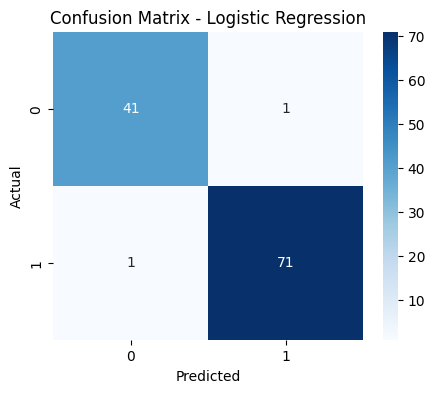

In [21]:
# Step 9: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)     # matrix of true vs predicted
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


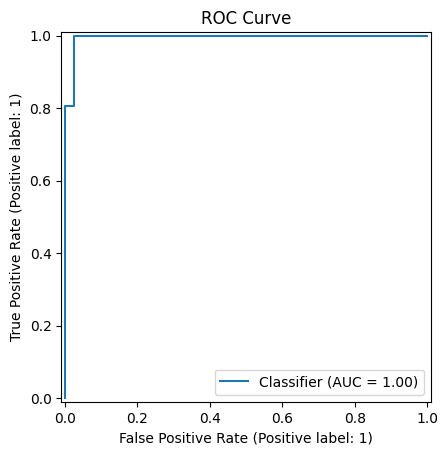

In [22]:
# Step 10: ROC Curve (optional but excellent visualization)
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve")
plt.show()

In [23]:
# Step 11: Hyperparameter tuning (GridSearch)
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10],   # inverse of regularization strength (small C = more regularization)
    "penalty": ["l2"]
}

grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring='f1')
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [33]:
# Step 12: Save model + predictions
joblib.dump(model, "C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Models\\logistic_regression_model.pkl")  # save model
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
pred_df.to_csv("C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Datasets\\LogisticRegression_Predictions.csv", index=False)